# ...............Explore Customers Table...............                

## 1) - Data Cleaning - Annual income column

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [134]:
df_cust = pd.read_csv(r"C:\Users\HP\Maths and statistics course codebasics\files\AtliQ bank project files\datasets\customers.csv")
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [135]:
df_cs = pd.read_csv(r"C:\Users\HP\Maths and statistics course codebasics\files\AtliQ bank project files\datasets\credit_profiles.csv")
df_trans = pd.read_csv(r"C:\Users\HP\Maths and statistics course codebasics\files\AtliQ bank project files\datasets\transactions.csv")

In [136]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [137]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [138]:
df_trans.shape

(500000, 7)

In [139]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


### i) - Handle Null values

In [140]:
df_cust.isnull().sum()                       # first step of data cleaning -- > handle null values


# get total null values count for every columns

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [141]:
df_cust[df_cust.annual_income.isnull()].head(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [142]:
df_cust.annual_income.median()

112218.5

In [143]:
meadian_income_artist = df_cust[df_cust.occupation == "Artist"].annual_income.median()
meadian_income_artist

45794.0

In [144]:
median_income_by_occupation = df_cust.groupby('occupation')['annual_income'].median()
median_income_by_occupation

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [145]:
#def get_median_val(row):
#  if pd.isnull(row["annual_income"]):
#       return median_income_by_occupation[row["occupation"]]
#  else:
#    return row["annual_income"]

In [146]:
df_cust["annual_income"] = df_cust.apply(
    lambda row: median_income_by_occupation[row["occupation"]] if pd.isnull(row["annual_income"]) else row["annual_income"],
    axis=1
)

In [147]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [148]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married
...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26,City,Freelancer,46759.0,Married
996,997,Aarav Dhawan,Male,55,City,Business Owner,290061.0,Single
997,998,Rehan Jha,Male,29,City,Fullstack Developer,139141.0,Married
998,999,Amara Rathore,Female,47,City,Business Owner,261191.5,Married


<Axes: xlabel='annual_income', ylabel='Count'>

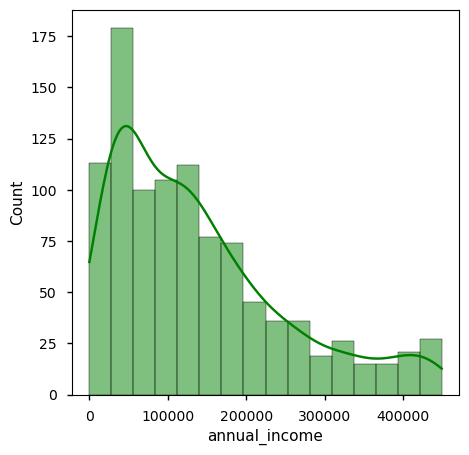

In [149]:
plt.figure(figsize = (5,5))
sns.histplot(df_cust.annual_income , kde = True , color="Green")

### ii) - Treat Outliers of Annual Income

In [150]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [151]:
df_cust[df_cust.annual_income < 100]       # business manager said anything less than 100 dollars is not a valid value

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [152]:
median_income_by_occupation


occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [153]:
df_cust.head(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [154]:
df_cust.at[2,"name"]                                     #    df.at(index , "column name")

'Aaryan Chauhan'

In [155]:
for index , row in df_cust.iterrows():
    if row["annual_income"] < 100:
        df_cust.at[index,"annual_income"] = median_income_by_occupation[row["occupation"]]
        


In [156]:
df_cust[df_cust.annual_income < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [157]:
df_cust.iloc[[31,592]]                   # correct!!!!!!!!!!!!!!!!

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,261191.5,Married


## 2) - Visualization Annual Income 

In [158]:
mean_income_by_occupation = df_cust.groupby('occupation')['annual_income'].mean()
mean_income_by_occupation                        

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [159]:
mean_income_by_occupation.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [160]:
mean_income_by_occupation.values

array([ 64123.5625    ,  45309.23684211, 268447.36851211,  60703.15463918,
       137021.26630435,  76327.50877193,  78727.97297297])

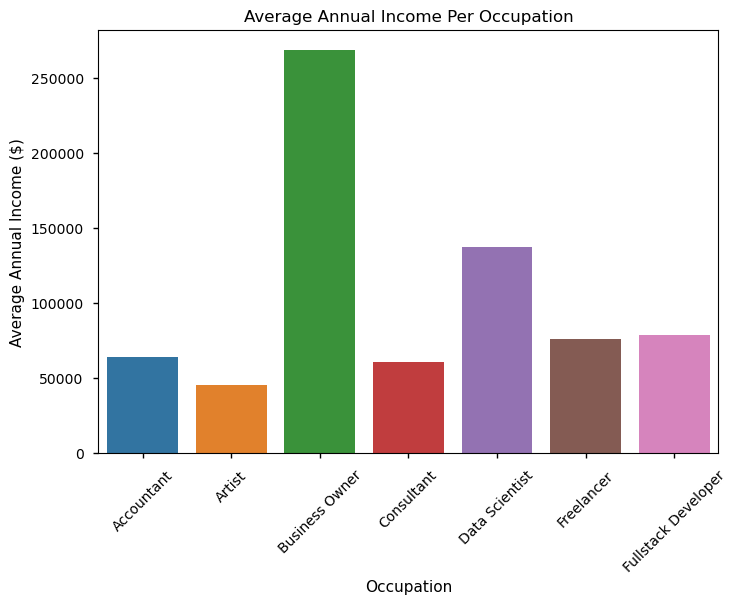

In [161]:

# Re-importing matplotlib to avoid any previous assignment issues
import matplotlib.pyplot as plt

# Sample data for mean_income_by_occupation (replace with your actual data)
mean_income_by_occupation = df_cust.groupby('occupation')['annual_income'].mean()

# Plotting the bar plot
sns.barplot(x=mean_income_by_occupation.index, y=mean_income_by_occupation.values, palette="tab10")
plt.xticks(rotation=45)
plt.title('Average Annual Income Per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income ($)')

plt.show()


In [162]:
categorical_columns = ['gender','location','occupation','marital_status']

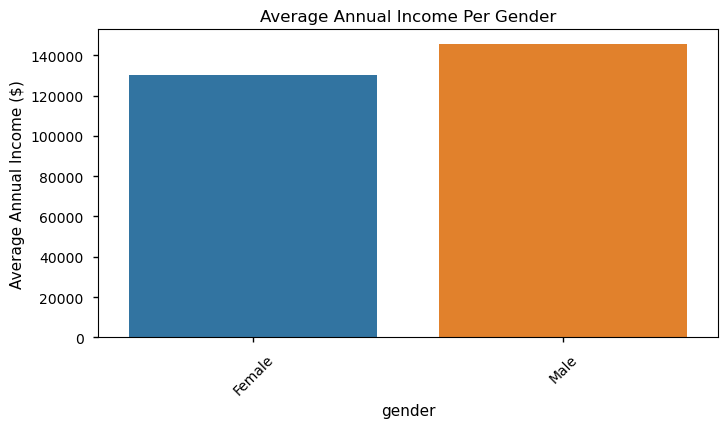

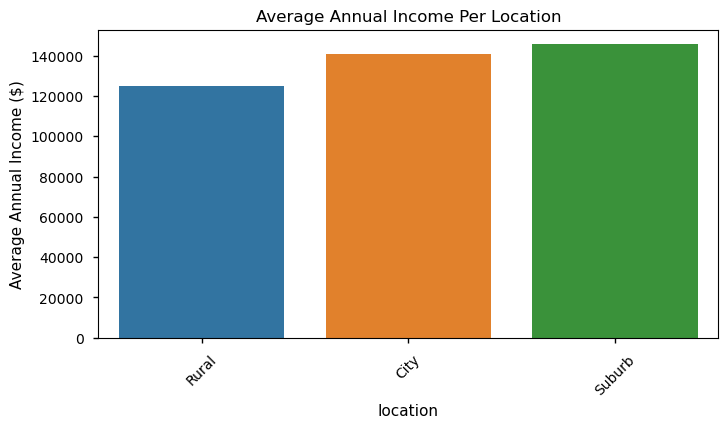

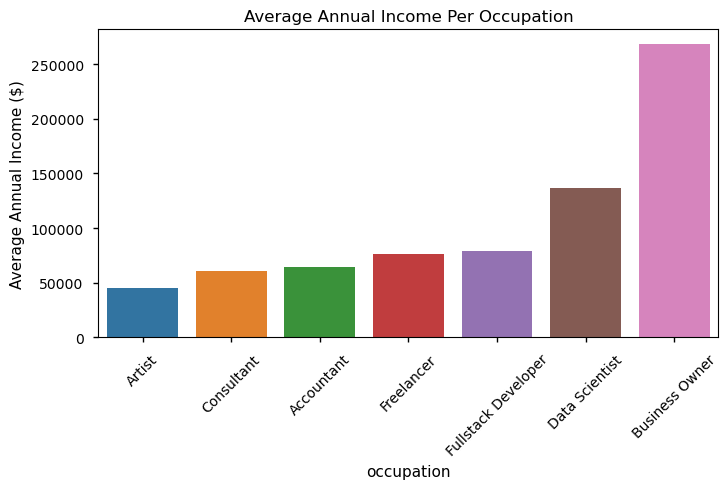

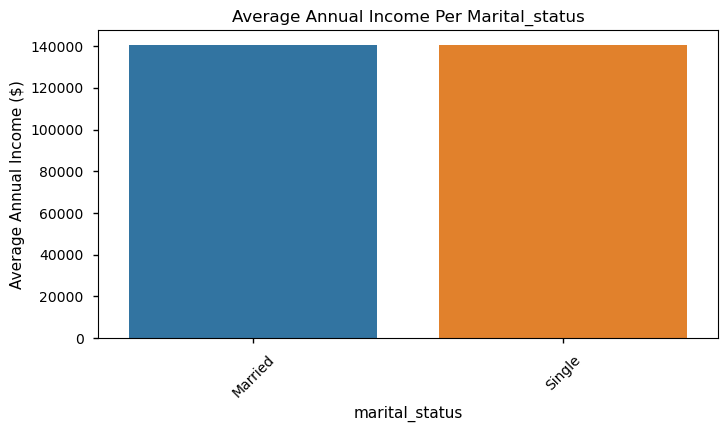

In [163]:
for col in categorical_columns:
    plt.figure(figsize = (8,4))
    average_income_per_group = df_cust.groupby(col)["annual_income"].mean().sort_values()
    sns.barplot(x = average_income_per_group.index , y = average_income_per_group.values , palette = "tab10")
    plt.xticks(rotation=45)
    plt.title(f'Average Annual Income Per {col.capitalize()}')
    plt.xlabel(col)
    plt.ylabel('Average Annual Income ($)')
    plt.show()
    

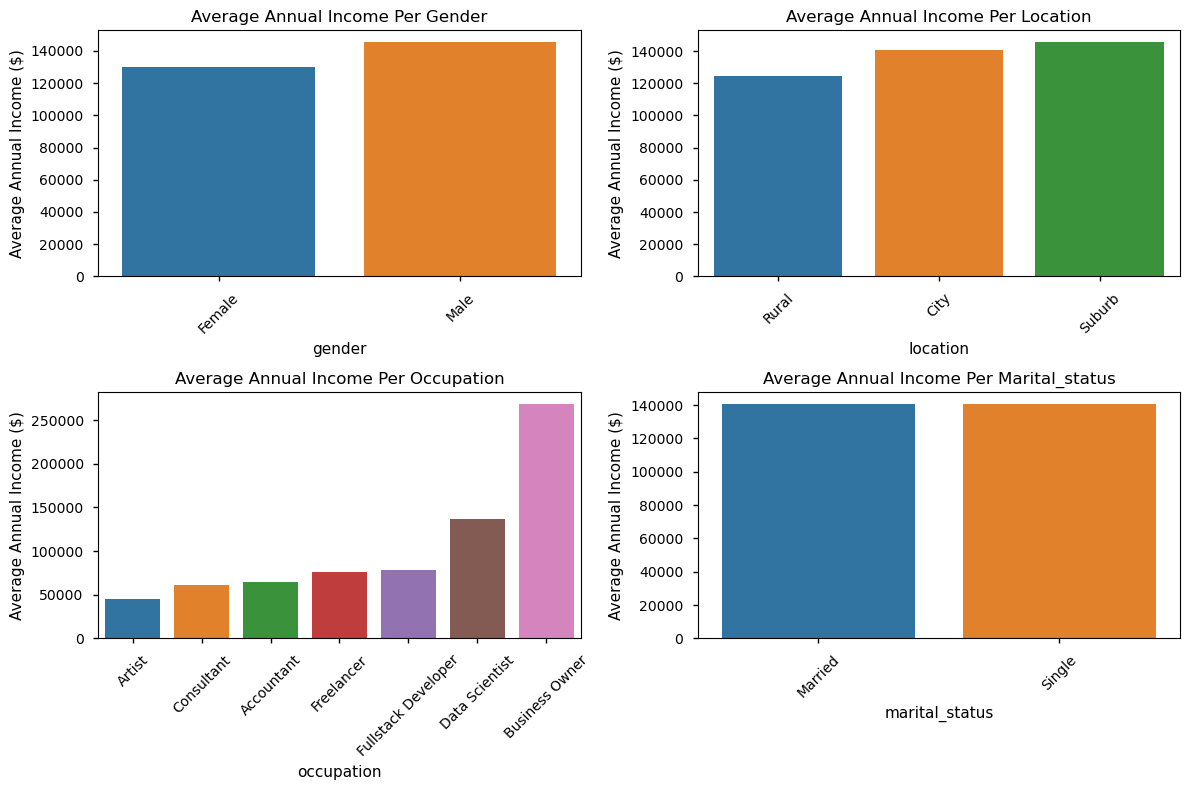

In [164]:


cat_cols = ['gender', 'location', 'occupation', 'marital_status']
num_rows = 2
num_cols = 2

#create sub plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    average_income_per_group = df_cust.groupby(col)["annual_income"].mean().sort_values()
    sns.barplot(x=average_income_per_group.index, y=average_income_per_group.values, palette="tab10",ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_title(f'Average Annual Income Per {col.capitalize()}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Average Annual Income ($)')

#hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [165]:
#       cat_cols = ["gender", "location", "occupation", "marital_status"]
#       for i, col in enumerate(cat_cols):
#             print(i, col)
    
#       OUTPUT --->    
#       0 gender
#       1 location
#       2 occupation
#       3 marital_status

In [166]:
#     What it does: 
#              axes[i] refers to the i-th subplot in the axes array. 
#                       Since axes is an array of Axes objects created by plt.subplots(), 
#                       axes[i] allows you to access each individual subplot.
#     Why use it: 
#             When you have multiple subplots, you need to customize each one separately. 
#             Using axes[i] ensures that the settings (like labels, titles, and tick labels) are applied to the correct subplot.

## 1)- Data Cleaning - Age Column

### i) - Handle Null Values

In [167]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

Age column didnt have null values!!

### ii) - Treat Outliers 

In [168]:
df_cust[(df_cust.age < 18) | (df_cust.age > 80)].shape

(20, 8)

In [169]:
median_age_by_occupation = df_cust.groupby("occupation")["age"].median()
median_age_by_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [170]:
for index , row in df_cust.iterrows():
    if (row["age"] < 15) | (row["age"] > 80):
        df_cust.at[index,"age"] = median_age_by_occupation[row["occupation"]]

In [171]:
df_cust.loc[[0,41]]                 # test    decision--> work success 

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,26.0,City,Artist,7621.0,Married


In [172]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.541500,140483.548500
std,288.819436,12.276634,110463.002934
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.250000,195514.250000
max,1000.000000,64.000000,449346.000000


## 2) - Visualization Age Column

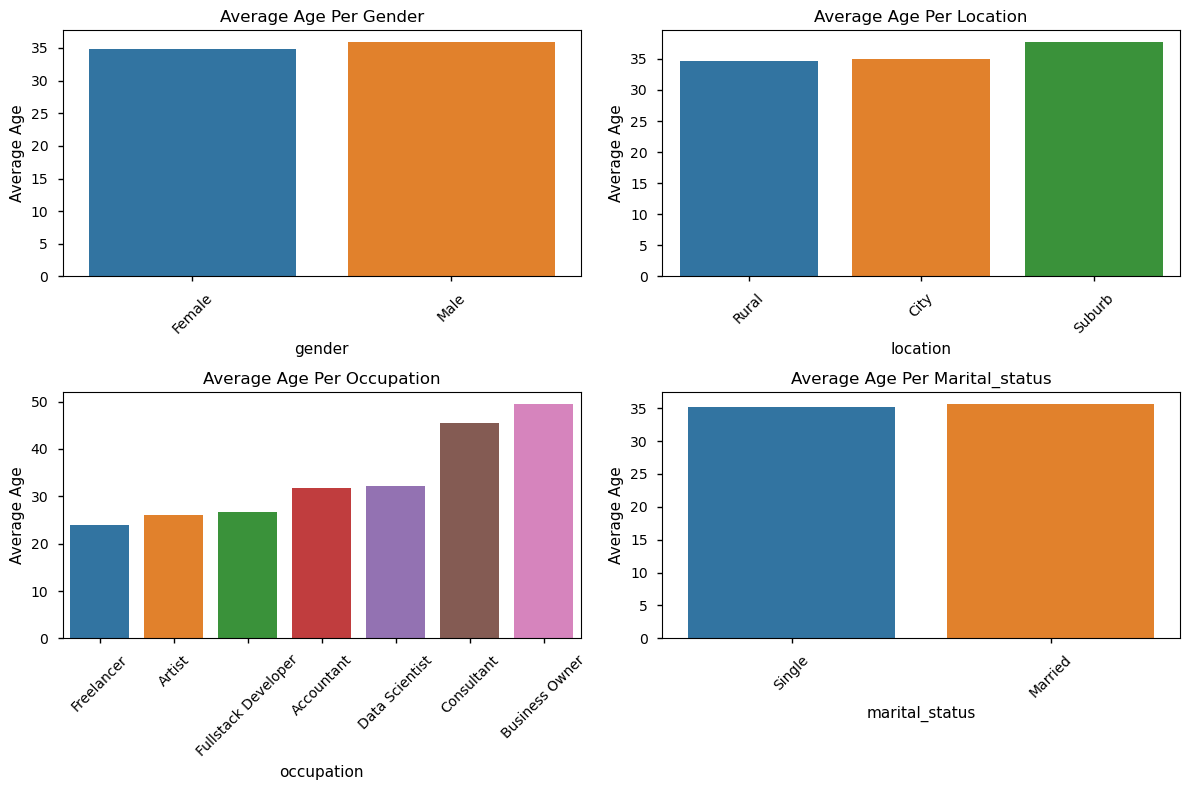

In [173]:
cat_cols = ["gender","location","occupation","marital_status"]

num_rows = 2
num_cols = 2

fig , axes = plt.subplots(num_rows,num_cols,figsize = (12 , 4 * num_rows))
axes = axes.flatten()

for i , col in enumerate(cat_cols):
    average_age_per_group = df_cust.groupby(col)["age"].mean().sort_values()
    sns.barplot( x = average_age_per_group.index , y = average_age_per_group.values ,palette ="tab10", ax = axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 45)
    axes[i].set_title(f"Average Age Per {col.capitalize()}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Average Age')
    
plt.tight_layout()
plt.show()

In [174]:
#------------------------------------------------------------------------------------

In [175]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married


In [176]:
bin_edges = [18, 25, 48, 65]
labels = ['18-25', '26-48', '49-65']

# Create a new column 'age_group' using pd.cut
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bin_edges, labels=labels, right=True, include_lowest=True)
df_cust.head(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [177]:
age_group_counts = df_cust.age_group.value_counts()     # this is more important code for pie chart making
age_group_counts

age_group
26-48    567
18-25    246
49-65    187
Name: count, dtype: int64

In [178]:
type(age_group_counts)            # pandas series can directly use with plt.pie

pandas.core.series.Series

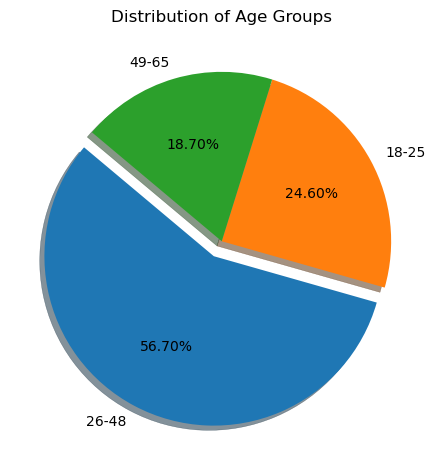

In [179]:
plt.pie(
    age_group_counts , 
    labels = age_group_counts.index , 
    autopct = '%1.2f%%' ,
    shadow =True,
    explode = (0.1,0,0),
    startangle = 140
)
plt.title("Distribution of Age Groups")
plt.show()

In [180]:
df_cust.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [181]:
df_cust.groupby(['location','gender']).size()     #this is multiple index array

location  gender
City      Female    226
          Male      457
Rural     Female     26
          Male       59
Suburb    Female     74
          Male      158
dtype: int64

In [182]:
customer_location_gender = df_cust.groupby(['location','gender']).size().unstack() 
customer_location_gender
# use to create data frame using multy index array

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


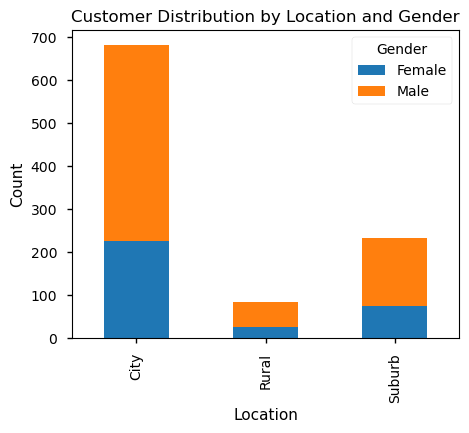

In [183]:
customer_location_gender.plot(kind ="bar" , stacked = True , figsize=(5,4))
plt.title("Customer Distribution by Location and Gender")
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title="Gender")
plt.show()

# ..............Explore Credit Score Table...............

In [184]:
df_cs = pd.read_csv(r"C:\Users\HP\Maths and statistics course codebasics\files\AtliQ bank project files\datasets\credit_profiles.csv")

In [185]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [186]:
df_cs.shape

(1004, 6)

In [187]:
df_cust.shape

(1000, 9)

df_cs have duplicates or extra records

## Remove Duplicates 

In [188]:
df_cs['cust_id'].nunique()

1000

In [189]:
df_cs[df_cs['cust_id'].duplicated(keep =False)]  # keep =False gives us all duplicated values

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [190]:
df_cs_clean_1 = df_cs.drop_duplicates(subset ="cust_id",keep ="last")
df_cs_clean_1.shape

(1000, 6)

In [191]:
df_cs_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [192]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [193]:
df_cs_clean_1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

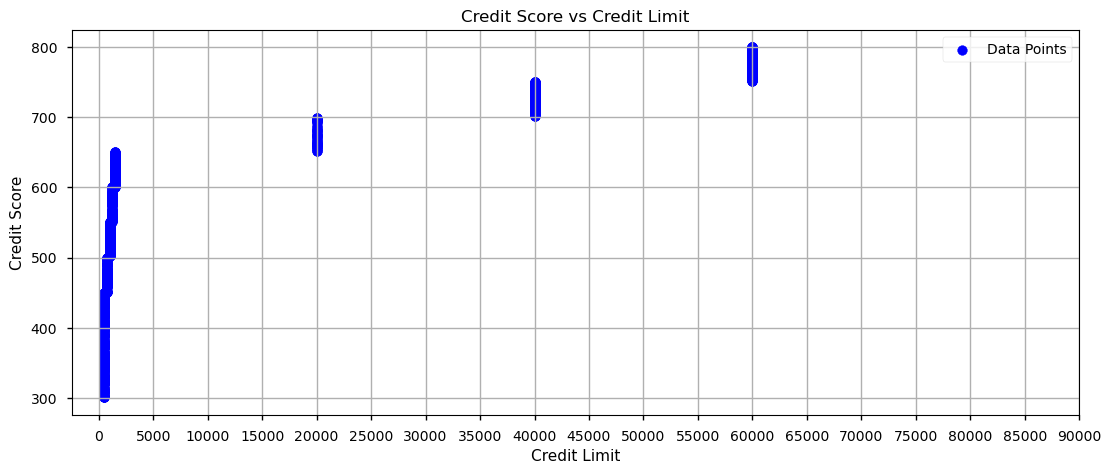

In [194]:
plt.figure(figsize = (13,5))
plt.scatter(df_cs_clean_1.credit_limit, df_cs_clean_1.credit_score, c="blue", marker="o", label="Data Points")
plt.title("Credit Score vs Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Credit Score")
plt.xticks(range(0,90001,5000))
plt.grid(True)

plt.legend()
plt.show()

In [195]:
bin_ranges =[300,450,500,550,600,650,700,750,800]

bin_labels = [f'{bin_ranges[i]}-{bin_ranges[i+1]-1}' for i in range(len(bin_ranges)-1)]

df_cs_clean_1['credit_score_range'] = pd.cut(df_cs_clean_1['credit_score'],bins = bin_ranges , labels = bin_labels ,include_lowest = True ,right = False  )

C:\Users\HP\AppData\Local\Temp\ipykernel_2556\2996512646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_clean_1['credit_score_range'] = pd.cut(df_cs_clean_1['credit_score'],bins = bin_ranges , labels = bin_labels ,include_lowest = True ,right = False  )


#                                        Explanation
right parameter: This parameter indicates whether the bins should include the right edge or not.

    right=True (default): Bins include the right edge and exclude the left edge, except for the very first bin which includes both edges if include_lowest=True.
    right=False: Bins include the left edge and exclude the right edge.

include_lowest parameter: This parameter determines if the first interval should include the lowest value.

    include_lowest=True: The first bin will include the lowest value, even if right=True.
    include_lowest=False (default): The first bin will not necessarily include the lowest value unless right=False.

In [196]:
df_cs_clean_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [197]:
df_cs_clean_1[df_cs_clean_1.credit_score_range == "700-749"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


In [198]:
df_cs_clean_1.groupby("credit_score_range")["credit_limit"].max()

credit_score_range
300-449      500.0
450-499      750.0
500-549     1000.0
550-599     1250.0
600-649     1500.0
650-699    20000.0
700-749    40000.0
750-799    60000.0
Name: credit_limit, dtype: float64

In [199]:
mode_df = df_cs_clean_1.groupby("credit_score_range")["credit_limit"].agg(lambda x: x.mode().iloc[0]).reset_index()


#      .agg(lambda x: x.mode()):

#     This applies a custom aggregation function using a lambda function.
#     The lambda function takes each group of credit_limit values and applies the mode() method.

# reset_index() -> convert it in to a data frame
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [200]:
null_df = df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()].reset_index()

null_df

,index,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,10,11,679,0.557450,9187.0,2.0,NaN,650-699
1,35,36,790,0.112535,4261.0,1.0,NaN,750-799
2,37,38,514,0.296971,238.0,2.0,NaN,500-549
3,45,46,761,0.596041,24234.0,2.0,NaN,750-799
4,64,65,734,0.473715,13631.0,0.0,NaN,700-749
...,...,...,...,...,...,...,...,...
60,912,909,479,0.487555,320.0,3.0,NaN,450-499
61,931,928,311,0.832244,316.0,2.0,NaN,300-449
62,948,945,526,0.272734,227.0,1.0,NaN,500-549
63,954,951,513,0.175914,131.0,3.0,NaN,500-549


In [201]:
df_cs_clean_2 = pd.merge(df_cs_clean_1,mode_df , on ="credit_score_range", suffixes = ("","_mode"))
df_cs_clean_2.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
229,48,504,0.503984,426.0,0.0,1000.0,500-549,1000.0
42,305,743,0.607688,20485.0,0.0,40000.0,700-749,40000.0
558,91,465,0.899648,506.0,4.0,750.0,450-499,750.0


In [202]:
df_cs_clean_2['credit_limit'].fillna(df_cs_clean_2['credit_limit_mode'],inplace = True)

df_cs_clean_2.head(5)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
2,7,747,0.523965,15544.0,4.0,40000.0,700-749,40000.0
3,17,702,0.894423,18444.0,0.0,40000.0,700-749,40000.0
4,28,729,0.149748,3453.0,2.0,40000.0,700-749,40000.0


In [203]:
df_cs_clean_2.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

In [204]:
df_cs_clean_2.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


### Remove outliers

<Axes: ylabel='outstanding_debt'>

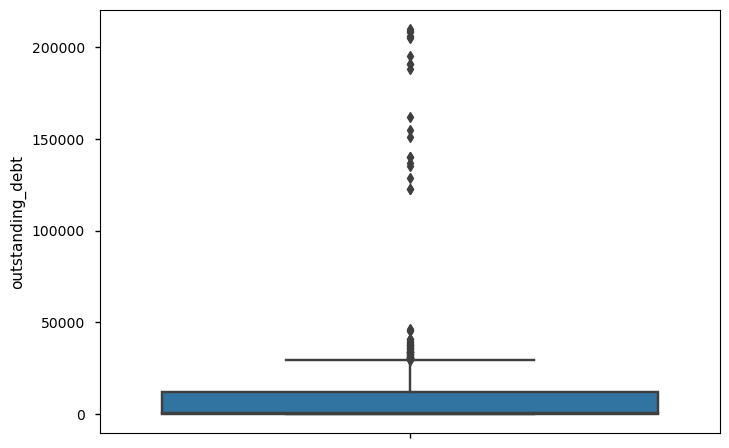

In [205]:
sns.boxplot(y = df_cs_clean_2.outstanding_debt)

In [206]:
df_cs_clean_2[df_cs_clean_2.outstanding_debt > df_cs_clean_2.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
6,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
12,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
35,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
41,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
101,726,737,0.136048,205404.0,4.0,40000.0,700-749,40000.0
142,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
363,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
406,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0
474,637,420,0.323984,140063.0,4.0,500.0,300-449,500.0
604,647,498,0.658087,128818.0,3.0,750.0,450-499,750.0


In [207]:
df_cs_clean_2.loc[df_cs_clean_2.outstanding_debt > df_cs_clean_2.credit_limit,'outstanding_debt']= df_cs_clean_2.credit_limit 


# replace outstanding_debt outliers with credit_limit


In [208]:
df_cs_clean_2[df_cs_clean_2.outstanding_debt > df_cs_clean_2.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [209]:
df_cs_clean_2.iloc[[6,13,44,105]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
6,39,734,0.573023,40000.0,3.0,40000.0,700-749,40000.0
13,110,724,0.802414,16454.0,0.0,40000.0,700-749,40000.0
44,328,742,0.364100,7360.0,2.0,40000.0,700-749,40000.0
105,753,736,0.191534,5566.0,1.0,40000.0,700-749,40000.0


## --------------------------------------------------------------------------------

# Correlation among Credit Profile Variables

### Bivariate Analysis

In [210]:
df_cs_clean_3 = df_cs_clean_2.copy()

In [211]:
df_cs_clean_3.head(5)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
2,7,747,0.523965,15544.0,4.0,40000.0,700-749,40000.0
3,17,702,0.894423,18444.0,0.0,40000.0,700-749,40000.0
4,28,729,0.149748,3453.0,2.0,40000.0,700-749,40000.0


In [212]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [213]:
df_merge = df_cust.merge(df_cs_clean_3, on = "cust_id" , how ="inner")
df_merge.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [214]:
df_merge[["credit_score","credit_limit"]]

,credit_score,credit_limit
0,749,40000.0
1,587,1250.0
2,544,1000.0
3,504,1000.0
4,708,40000.0
...,...,...
995,564,1250.0
996,774,60000.0
997,529,1000.0
998,725,40000.0


In [215]:
df_merge[["credit_score","credit_limit"]].corr()

,credit_score,credit_limit
credit_score,1.000000,0.847952
credit_limit,0.847952,1.000000


In [216]:
numeric_cols = ['credit_score' , 'credit_utilisation','outstanding_debt','credit_limit','annual_income','age']
correlation_matrix = df_merge[numeric_cols].corr()
correlation_matrix


,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575751,0.444917
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086368,-0.027713
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444301
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684775,0.510993
annual_income,0.575751,-0.086368,0.555661,0.684775,1.000000,0.619037
age,0.444917,-0.027713,0.444301,0.510993,0.619037,1.000000


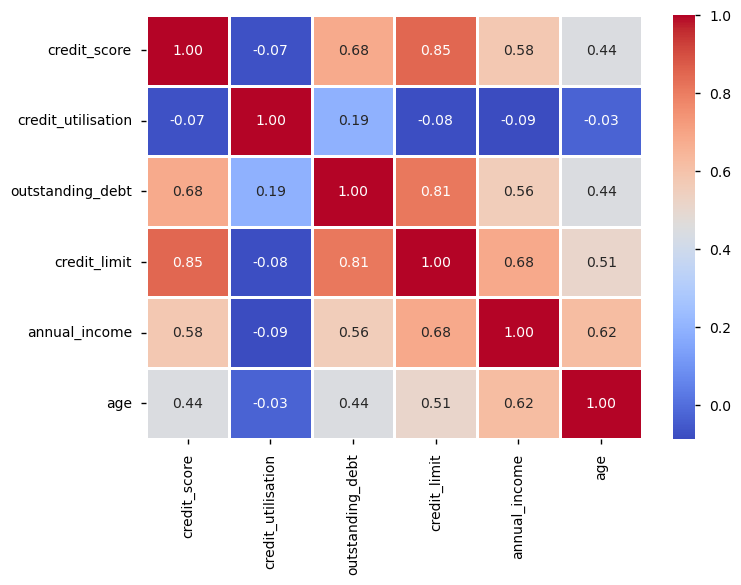

In [217]:
sns.heatmap(correlation_matrix , annot = True , fmt = ".2f", cmap = "coolwarm" , linewidth = 0.9)
plt.show()

# annot gives values in cell, default it not view
# fmt for decimal places

# ...............Explore Transaction Table...............                

In [218]:
df_transactions = pd.read_csv(r"C:\Users\HP\Maths and statistics course codebasics\files\AtliQ bank project files\datasets\transactions.csv")

df_transactions.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe


In [219]:
df_transactions.shape

(500000, 7)

In [220]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [221]:
df_transactions.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [222]:
df_transactions[df_transactions.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Electronics'),
  Text(1, 0, 'Fashion & Apparel'),
  Text(2, 0, 'Sports'),
  Text(3, 0, 'Kitchen Appliances'),
  Text(4, 0, 'Beauty & Personal Care'),
  Text(5, 0, 'Garden & Outdoor'),
  Text(6, 0, 'Books'),
  Text(7, 0, 'Home Decor'),
  Text(8, 0, 'Toys & Games')])

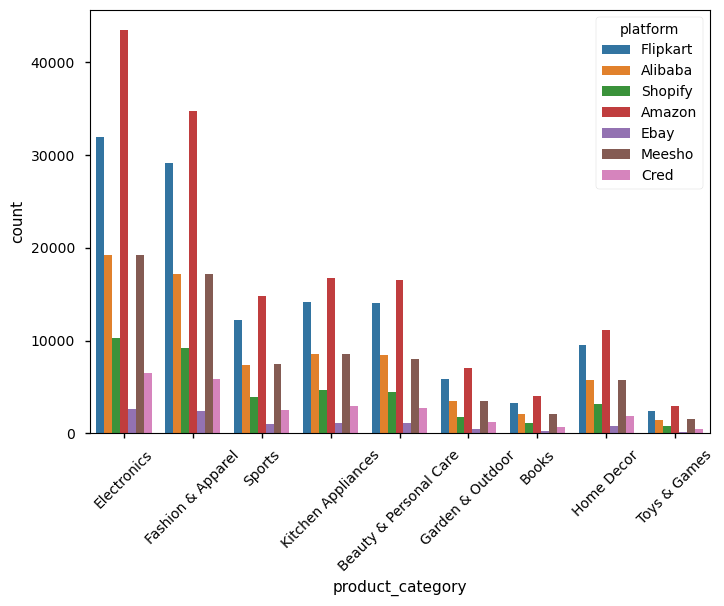

In [223]:
sns.countplot (x = "product_category" , hue = "platform" , data = df_transactions)
plt.xticks(rotation=45)

In [224]:
Group_1 = df_transactions.groupby(['cust_id', 'product_category','platform']).size().reset_index(name='total_count')
Group_1

,cust_id,product_category,platform,total_count
0,1,Beauty & Personal Care,Alibaba,8
1,1,Beauty & Personal Care,Amazon,16
2,1,Beauty & Personal Care,Cred,3
3,1,Beauty & Personal Care,Ebay,2
4,1,Beauty & Personal Care,Flipkart,7
...,...,...,...,...
53181,1000,Sports,Shopify,3
53182,1000,Toys & Games,Alibaba,1
53183,1000,Toys & Games,Amazon,2
53184,1000,Toys & Games,Cred,1


In [225]:
customers = df_transactions.cust_id.unique()
customers = sorted(customers)

products = df_transactions.product_category.unique()


In [226]:
for i in customers:
    for j in products:
        if j in Group_1['product_category'].values:
            data = Group_1[(Group_1.cust_id == i) & (Group_1.product_category == j)]
            data_1 = data[(data.total_count == data["total_count"].max())]
            column1 = []
            column2 = []
            column3 =[]
            column1.append(data_1.cust_id)
            column2.append(data_1.product_category)
            column3.append(data_1.platform)
            
            
prefered_df = pd.DataFrame({
    "cust_id" : column1,
    "product_category" : column2,
    "platform_most_prefered" : column3
}) 



In [227]:

# The error in your code likely arises from the repeated reinitialization of the lists column1, column2, and column3 
# within the nestedloops.

# This causes each list to contain only the last appended value. Additionally, when you use append, you're appending 
# pandas Series objects directly, which may not produce the expected results. Instead, you should append the values 
# from the Series.


In [228]:
column1 = []
column2 = []
column3 =[]
for i in customers:
    for j in products:
        if j in Group_1['product_category'].values:
            data = Group_1[(Group_1.cust_id == i) & (Group_1.product_category == j)]
            if not data.empty:
                data_1 = data[(data.total_count == data["total_count"].max())]
              
                column1.append(data_1.iloc[0]["cust_id"])
                column2.append(data_1.iloc[0]["product_category"])
                column3.append(data_1.iloc[0]["platform"])
            
            
prefered_df = pd.DataFrame({
    "cust_id" : column1,
    "product_category" : column2,
    "most_prefered" : column3
}) 

prefered_df.head(20)

,cust_id,product_category,most_prefered
0,1,Electronics,Amazon
1,1,Fashion & Apparel,Amazon
2,1,Sports,Amazon
3,1,Kitchen Appliances,Amazon
4,1,Beauty & Personal Care,Amazon
5,1,Garden & Outdoor,Flipkart
6,1,Books,Flipkart
7,1,Home Decor,Amazon
8,1,Toys & Games,Cred
9,2,Electronics,Amazon


In [229]:
prefered_df.product_category.unique()      # check the new df

array(['Electronics', 'Fashion & Apparel', 'Sports', 'Kitchen Appliances',
       'Beauty & Personal Care', 'Garden & Outdoor', 'Books',
       'Home Decor', 'Toys & Games'], dtype=object)

In [230]:

df_merge = pd.merge(df_transactions ,prefered_df , on =["cust_id","product_category"])
df_merge[df_merge.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,most_prefered
129,379477,705,2023-07-08,708,NaN,Electronics,Gpay,Amazon
316,63050,797,2023-02-01,113,NaN,Fashion & Apparel,Debit Card,Amazon
380,254460,797,2023-05-07,20,NaN,Fashion & Apparel,Gpay,Amazon
648,68247,527,2023-02-03,105,NaN,Fashion & Apparel,Phonepe,Amazon
714,480933,527,2023-08-27,39,NaN,Fashion & Apparel,Credit Card,Amazon
...,...,...,...,...,...,...,...,...
499320,478603,891,2023-08-26,30,NaN,Books,Credit Card,Amazon
499336,435872,987,2023-08-05,47,NaN,Toys & Games,Phonepe,Amazon
499430,184441,119,2023-04-02,118,NaN,Garden & Outdoor,Gpay,Flipkart
499900,369850,568,2023-07-03,244,NaN,Home Decor,Gpay,Flipkart


In [231]:
df_merge['platform'].fillna(df_merge['most_prefered'],inplace = True)

df_merge[df_merge.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,most_prefered


In [232]:
df_merge.iloc[[316,380,648,499430
              ]]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,most_prefered
316,63050,797,2023-02-01,113,Amazon,Fashion & Apparel,Debit Card,Amazon
380,254460,797,2023-05-07,20,Amazon,Fashion & Apparel,Gpay,Amazon
648,68247,527,2023-02-03,105,Amazon,Fashion & Apparel,Phonepe,Amazon
499430,184441,119,2023-04-02,118,Flipkart,Garden & Outdoor,Gpay,Flipkart


In [233]:
df_transactions = df_merge.copy()
df_transactions.head()


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,most_prefered
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe,Amazon
1,780,705,2023-01-01,300,Shopify,Electronics,Gpay,Amazon
2,5128,705,2023-01-03,848,Meesho,Electronics,Gpay,Amazon
3,16114,705,2023-01-08,407,Flipkart,Electronics,Debit Card,Amazon
4,18697,705,2023-01-10,994,Amazon,Electronics,Gpay,Amazon


### ---------------------------------------------------------------------------------------------------------------------------------------------------

In [234]:
df_transactions.describe()


,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [235]:
df_trans_zero = df_transactions[df_transactions.tran_amount == 0]
df_trans_zero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,most_prefered
36,124995,705,2023-03-03,0,Amazon,Electronics,Credit Card,Amazon
113,319135,705,2023-06-08,0,Amazon,Electronics,Credit Card,Amazon
142,414281,705,2023-07-25,0,Amazon,Electronics,Credit Card,Amazon
150,451376,705,2023-08-12,0,Amazon,Electronics,Credit Card,Amazon
763,130619,388,2023-03-06,0,Amazon,Electronics,Credit Card,Amazon
...,...,...,...,...,...,...,...,...
473916,159482,758,2023-03-21,0,Amazon,Electronics,Credit Card,Amazon
473937,247726,758,2023-05-03,0,Amazon,Electronics,Credit Card,Amazon
473979,373382,758,2023-07-05,0,Amazon,Electronics,Credit Card,Amazon
474005,468343,758,2023-08-21,0,Amazon,Electronics,Credit Card,Amazon


In [236]:
df_trans_zero.shape


(4734, 8)

In [237]:
df_transactions.shape


(500000, 8)

In [238]:
df_trans_zero.platform.value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [239]:
df_trans_zero[["platform","product_category","payment_type"]].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [240]:
df_trans_1 = df_transactions[(df_transactions.platform == 'Amazon') & (df_transactions.product_category == 'Electronics') & (df_transactions.payment_type == 'Credit Card')]
df_trans_1

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,most_prefered
21,74356,705,2023-02-06,56702,Amazon,Electronics,Credit Card,Amazon
36,124995,705,2023-03-03,0,Amazon,Electronics,Credit Card,Amazon
38,130944,705,2023-03-06,595,Amazon,Electronics,Credit Card,Amazon
77,244593,705,2023-05-02,380,Amazon,Electronics,Credit Card,Amazon
98,286309,705,2023-05-23,173,Amazon,Electronics,Credit Card,Amazon
...,...,...,...,...,...,...,...,...
473986,405666,758,2023-07-21,433,Amazon,Electronics,Credit Card,Amazon
473989,415470,758,2023-07-26,624,Amazon,Electronics,Credit Card,Amazon
474005,468343,758,2023-08-21,0,Amazon,Electronics,Credit Card,Amazon
474006,471608,758,2023-08-22,850,Amazon,Electronics,Credit Card,Amazon


In [241]:
median_to_replace = df_trans_1[df_trans_1.tran_amount >0].tran_amount.median()

In [242]:
median_to_replace

553.0

In [243]:
df_transactions['tran_amount'].replace(0,median_to_replace , inplace = True)

In [244]:
df_transactions[df_transactions.tran_amount == 0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,most_prefered


<Axes: xlabel='tran_amount', ylabel='Count'>

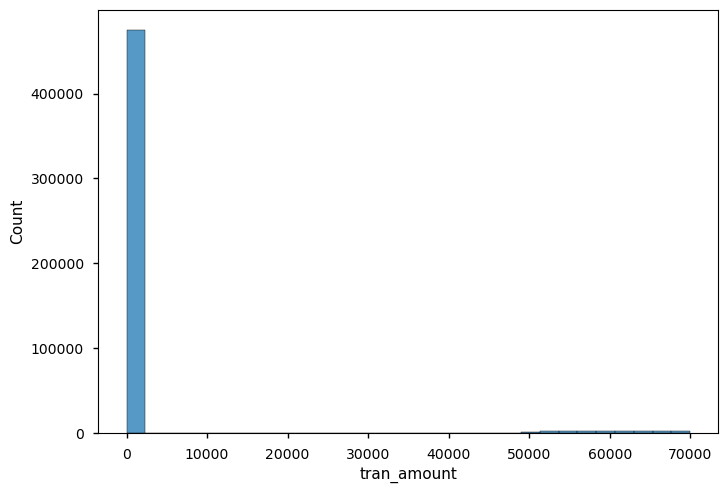

In [245]:
sns.histplot(df_transactions.tran_amount , bins = 30)

In [246]:
Q1 , Q3 = df_transactions['tran_amount'].quantile([0.25 , 0.75])
IQR = Q3 - Q1
lower = Q1 - 2 * IQR
upper = Q3 + 2 * IQR

lower , upper

(-628.0, 1107.0)

In [247]:

df_tran_outliers = df_transactions[df_transactions.tran_amount > upper]
df_tran_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,most_prefered
19,66827,705,2023-02-03,67974,Meesho,Electronics,Gpay,Amazon
21,74356,705,2023-02-06,56702,Amazon,Electronics,Credit Card,Amazon
23,79707,705,2023-02-09,51858,Alibaba,Electronics,Gpay,Amazon
30,101191,705,2023-02-20,62034,Alibaba,Electronics,Net Banking,Amazon
63,208445,705,2023-04-14,57151,Flipkart,Electronics,Gpay,Amazon
...,...,...,...,...,...,...,...,...
499942,400125,806,2023-07-18,60146,Amazon,Home Decor,Phonepe,Meesho
499954,451901,496,2023-08-13,54398,Flipkart,Home Decor,Phonepe,Cred
499961,397615,165,2023-07-17,54949,Amazon,Garden & Outdoor,Phonepe,Flipkart
499962,417598,165,2023-07-27,62216,Flipkart,Garden & Outdoor,Debit Card,Flipkart


In [248]:
df_tran_outliers.shape

(25000, 8)

In [249]:
df_trans_normal = df_transactions[df_transactions.tran_amount < upper]
df_trans_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,most_prefered
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe,Amazon
1,780,705,2023-01-01,300,Shopify,Electronics,Gpay,Amazon
2,5128,705,2023-01-03,848,Meesho,Electronics,Gpay,Amazon
3,16114,705,2023-01-08,407,Flipkart,Electronics,Debit Card,Amazon
4,18697,705,2023-01-10,994,Amazon,Electronics,Gpay,Amazon
...,...,...,...,...,...,...,...,...
499995,456615,772,2023-08-15,110,Meesho,Kitchen Appliances,Phonepe,Meesho
499996,462006,663,2023-08-18,219,Flipkart,Garden & Outdoor,Credit Card,Flipkart
499997,467857,498,2023-08-21,280,Alibaba,Kitchen Appliances,Phonepe,Alibaba
499998,473382,325,2023-08-23,175,Flipkart,Garden & Outdoor,Phonepe,Flipkart


In [250]:
tran_mean_per_category = df_trans_normal.groupby("product_category")["tran_amount"].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.135644
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [251]:
df_transactions.loc[df_tran_outliers.index , "tran_amount"] = df_tran_outliers['product_category'].map(tran_mean_per_category)

In [252]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,most_prefered
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe,Amazon
1,780,705,2023-01-01,300.0,Shopify,Electronics,Gpay,Amazon
2,5128,705,2023-01-03,848.0,Meesho,Electronics,Gpay,Amazon
3,16114,705,2023-01-08,407.0,Flipkart,Electronics,Debit Card,Amazon
4,18697,705,2023-01-10,994.0,Amazon,Electronics,Gpay,Amazon


<Axes: xlabel='payment_type', ylabel='count'>

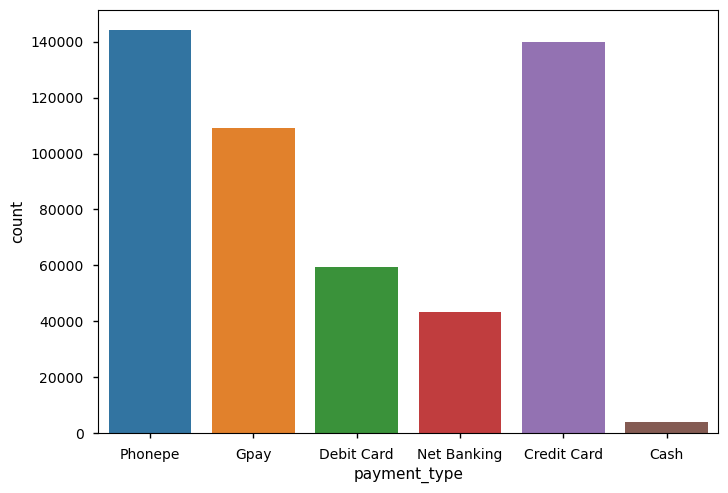

In [253]:
sns.countplot(x=df_transactions.payment_type  )

In [254]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [255]:
df_merged_2 = pd.merge(df_cust,df_transactions , on ="cust_id" , how ="inner")
df_merged_2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,tran_id,tran_date,tran_amount,platform,product_category,payment_type,most_prefered
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking,Amazon
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card,Amazon
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,6538,2023-01-04,48.0,Alibaba,Fashion & Apparel,Gpay,Amazon
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,22135,2023-01-11,13.0,Ebay,Fashion & Apparel,Phonepe,Amazon
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,23270,2023-01-12,13.0,Amazon,Fashion & Apparel,Credit Card,Amazon


In [256]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


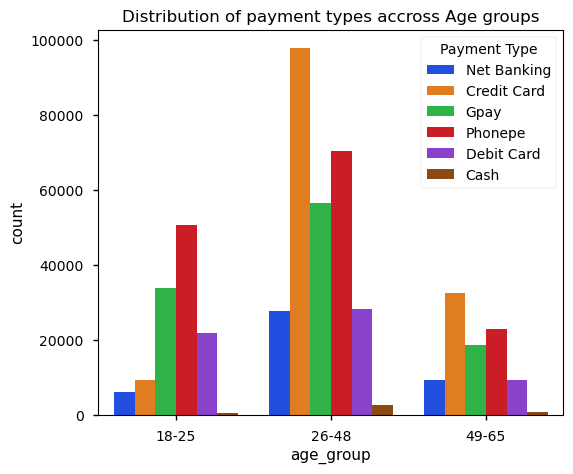

In [257]:
plt.style.use('seaborn-v0_8-notebook')
plt.figure(figsize=(6,5))
plt.title("Distribution of payment types accross Age groups")
sns.countplot(x = "age_group" , data = df_merged_2 , hue ="payment_type" , palette ="bright")
plt.legend(title ='Payment Type' , loc ='upper right')

plt.show()


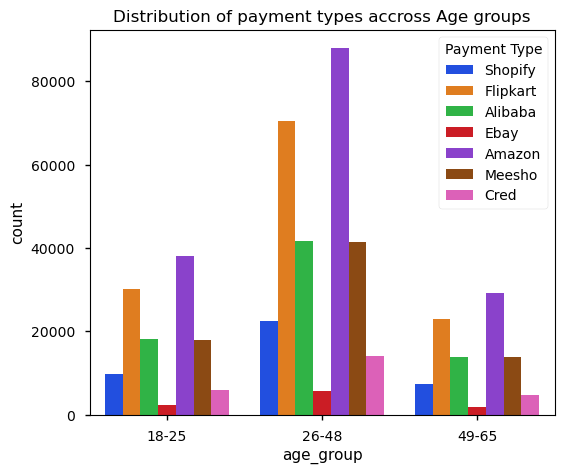

In [258]:
plt.style.use('seaborn-v0_8-notebook')
plt.figure(figsize=(6,5))
plt.title("Distribution of payment types accross Age groups")
sns.countplot(x = "age_group" , data = df_merged_2 , hue ="platform" , palette ="bright")
plt.legend(title ='Payment Type' , loc ='upper right')

plt.show()


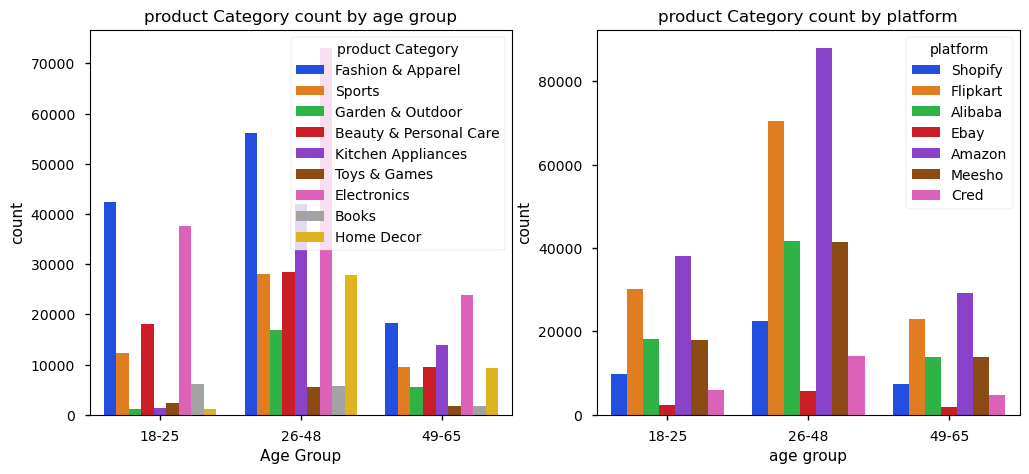

In [259]:
fix , (ax1,ax2) = plt.subplots(1,2,figsize =(12,5))
sns.countplot(x = "age_group" , data = df_merged_2 , hue ="product_category" ,palette ='bright', ax=ax1)
ax1.set_title("product Category count by age group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("count")
ax1.legend(title = "product Category", loc ='upper right')


sns.countplot(x = "age_group" , data = df_merged_2 , hue ="platform" ,palette ='bright', ax=ax2)
ax2.set_title("product Category count by platform")
ax2.set_xlabel("age group")
ax2.set_ylabel("count")
ax2.legend(title = "platform", loc ='upper right')


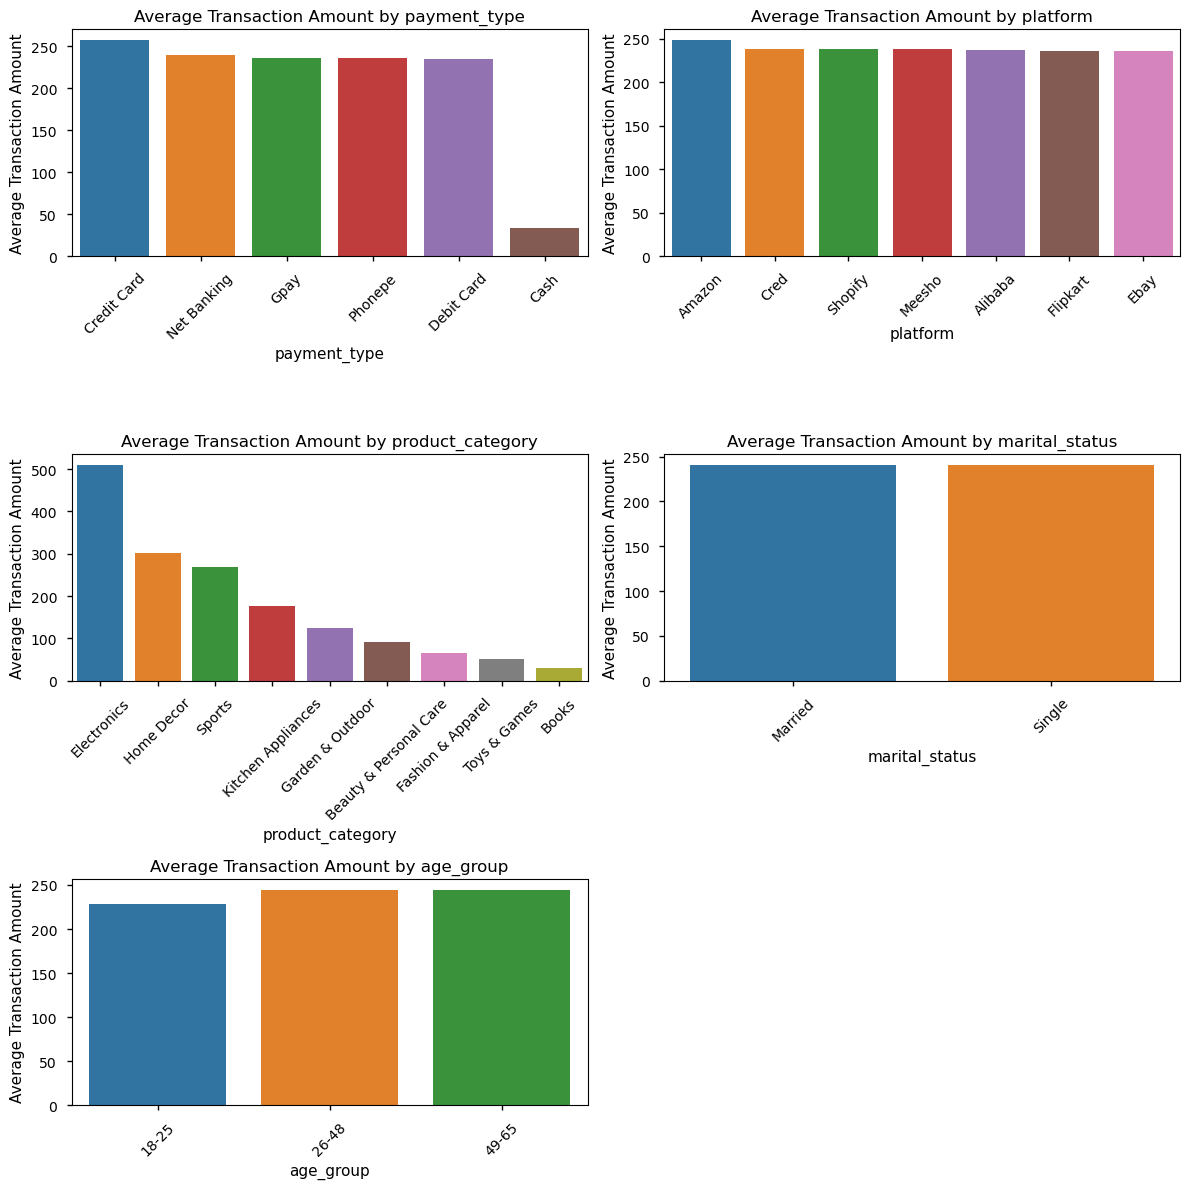

In [264]:
cat_cols = ['payment_type','platform','product_category','marital_status','age_group']

num_rows = 3
#create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
#flatten the axes array to make it easier to iterate
axes = axes.flatten()

#create subplot for each categorical column
for i, cat_col in enumerate(cat_cols):
    #calculate average transaction amount for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()

    #sort the data by transaction amount before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, errorbar=None, ax=axes[i])
    axes[i].set_title(f'Average Transaction Amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Transaction Amount')
    
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

#hide any unused sub plots

for i in range (len(cat_cols),len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()


In [269]:
df_merge_3 = df_cust.merge(df_cs_clean_3, on = "cust_id" , how ="inner")

In [271]:
age_group_matrix = df_merge_3.groupby('age_group')[['annual_income','credit_limit','credit_score']].mean().reset_index()
age_group_matrix

,age_group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,145869.623457,20560.846561,597.569665
2,49-65,260165.925134,41699.197861,701.524064


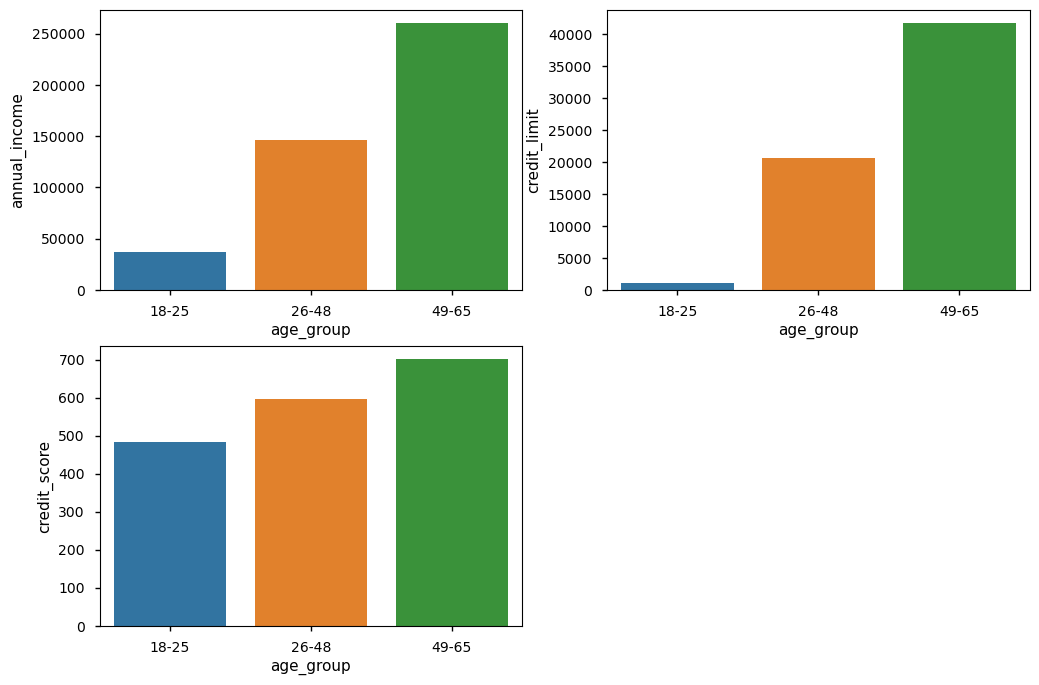

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

num_rows = 2
categories_age = ["annual_income", "credit_limit", "credit_score"]
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4* num_rows))
axes = axes.flatten()

for i, cat_age in enumerate(categories_age):
    sns.barplot(x='age_group', y=cat_age, data=age_group_matrix, errorbar=None, ax=axes[i])
    
for i in range (len(categories_age),len(axes)):

    fig.delaxes(axes[i])

plt.show()


In [ ]:
# End of data cleaning and visualization